In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from keras.layers import Dense,Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from IPython.display import clear_output 
import threading
import imgaug.augmenters as iaa
from keras import backend as K
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from random import sample, choice
from PIL import Image
import albumentations as albu

import time
import os
from tqdm.notebook import tqdm

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # showing and rendering figures
# io related
from skimage.io import imread
import os
from glob import glob
# not needed in Kaggle, but required in Jupyter
#%matplotlib inline

In [3]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


In [4]:
import splitfolders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
x=splitfolders.ratio("../input/the-kvasir-dataset/kvasir-dataset-v2", output="spiltted",
    seed=0, ratio=(0.7,0.2,0.1)) # default values

# Split val/test with a fixed number of items, e.g. `(100, 100)`, for each set.
# To only split into training and validation set, use a single number to `fixed`, i.e., `10`.
# Set 3 values, e.g. `(300, 100, 100)`, to limit the number of training values.
# splitfolders.fixed("../input/the-kvasir-dataset/kvasir-dataset-v2", output="split_data",
#    seed=1337, fixed=(700,200, 100), oversample=False, group_prefix=None, move=False) # default values

Copying files: 8000 files [01:30, 88.55 files/s]


In [5]:
data=ImageDataGenerator(rotation_range = 20, width_shift_range=0.05, shear_range=0.2,
                            zoom_range=0.2, fill_mode='nearest',
                            horizontal_flip=True, vertical_flip=True,
                            rescale=1/255)

  

train_dataset = data.flow_from_directory( directory='./spiltted/train',
                                        target_size=(224,224), batch_size=50, class_mode='categorical', 
                                        shuffle=True)

valid_dataset  =  data.flow_from_directory('./spiltted/val',
                        target_size=(224,224), batch_size=50, class_mode='categorical')
test_dataset = data.flow_from_directory('./spiltted/test',
                        target_size=(224,224),batch_size=10,class_mode='categorical',shuffle=False)

Found 5600 images belonging to 8 classes.
Found 1600 images belonging to 8 classes.
Found 800 images belonging to 8 classes.


In [6]:
test_dataset.class_indices

{'dyed-lifted-polyps': 0,
 'dyed-resection-margins': 1,
 'esophagitis': 2,
 'normal-cecum': 3,
 'normal-pylorus': 4,
 'normal-z-line': 5,
 'polyps': 6,
 'ulcerative-colitis': 7}

In [7]:
x=test_dataset.class_indices

./spiltted/train/normal-cecum/a98d59d6-8d81-4a17-89da-0974dcf69314.jpg
./spiltted/train/normal-pylorus/c5f11c71-5711-4ee3-bd9f-06ea49b8dc57.jpg
./spiltted/train/dyed-lifted-polyps/1772420c-014c-4922-a54f-36308db05ce6.jpg
./spiltted/train/normal-z-line/b1427373-30bc-4026-a808-fc26ca44d424.jpg
./spiltted/train/esophagitis/b0768234-5fd3-42a5-ad88-940fc8159ca2.jpg
./spiltted/train/ulcerative-colitis/3a589fcf-768f-4ebf-9812-002135ef0c03.jpg
./spiltted/train/polyps/efc4c1a2-b096-47ba-a0e4-35668c870175.jpg
./spiltted/train/dyed-resection-margins/10f44652-89a8-43dc-b620-cc05c9470158.jpg


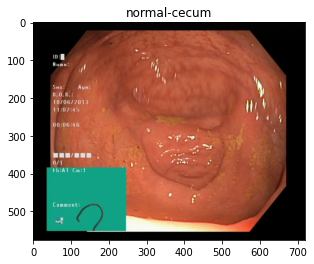

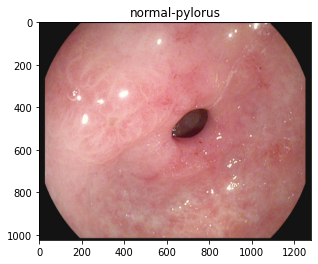

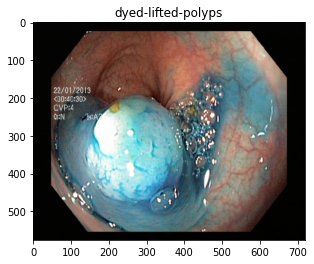

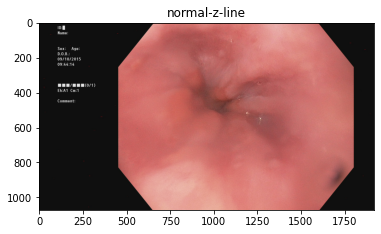

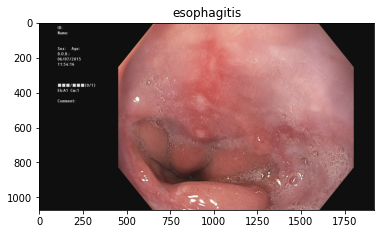

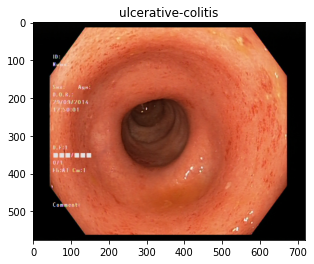

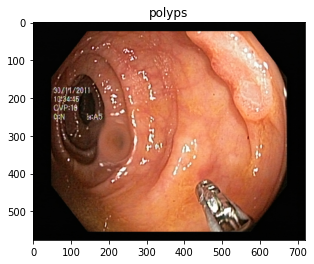

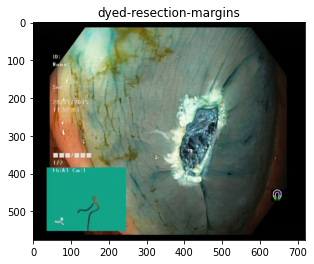

In [8]:
main_folder='./spiltted/train'
directory=os.listdir(main_folder)
for each in directory:
    plt.figure()
    currentFolder = main_folder +"/" + each
    for i, file in enumerate(os.listdir(currentFolder)[0:1]):
        fullpath = currentFolder + "/" + file
        print(fullpath)
#         print(each)
        img=plt.imread(fullpath)
        plt.subplot(1,1 ,i+1).set_title(each)
#         plt.suptitle("validation")
        plt.imshow(img)

In [9]:
# main_folder='./spiltted/val'
# directory=os.listdir(main_folder)
# for each in directory:
#     currentFolder =main_folder +"/" + each
#     for file in os.listdir(currentFolder)[0:1]:
#         fullpath = currentFolder+ "/" + file
#         print(fullpath)
#         img=plt.imread(fullpath)
#         plt.imshow(img)

In [10]:
# def count(path):
#     x=[]
#     y=os.listdir(path)
#     for dirpath, dirnames, filenames in os.walk(path):
#         n=len(filenames)
#         x.append(n)
#     x=x[1:9]
#     new_dict = dict(zip(y, x))
#     return x,y,new_dict
#     def plot_count(x,y,new_dict):
#         plt.figure(figsize=(15, 6))
#         plt.bar(range(len(x)), list(new_dict.values()), align='center')
#         plt.xticks(range(len(x)), list(new_dict.keys()))
#         plt.title('Distribution of different classes in training datset')
#         plt.show()
    


In [11]:
#     def plot_count(x,y,new_dict):
#         plt.figure(figsize=(15, 6))
#         plt.bar(range(len(x)), list(new_dict.values()), align='center')
#         plt.xticks(range(len(x)), list(new_dict.keys()))
#         plt.title('Distribution of different classes in training datset')
#         plt.show()

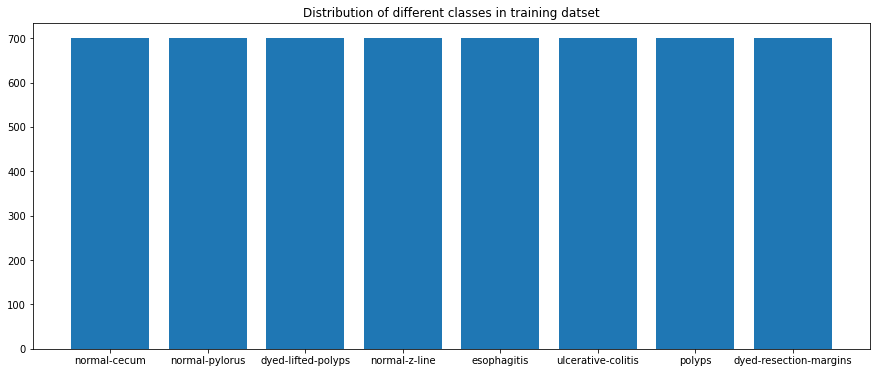

In [12]:
x=[]
path='./spiltted/train'
y=os.listdir(path)
for dirpath, dirnames, filenames in os.walk(path):
    n=len(filenames)
    x.append(n)
x=x[1:9]
new_dict = dict(zip(y, x))
plt.figure(figsize=(15, 6))
plt.bar(range(len(x)), list(new_dict.values()), align='center')
plt.xticks(range(len(x)), list(new_dict.keys()))
plt.title('Distribution of different classes in training datset')
plt.show()

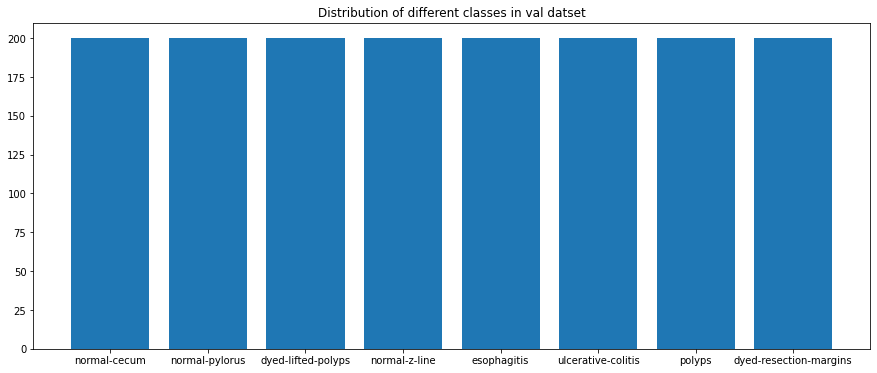

In [13]:
x=[]
path='./spiltted/val'
y=os.listdir(path)
for dirpath, dirnames, filenames in os.walk(path):
    n=len(filenames)
    x.append(n)
x=x[1:9]
new_dict = dict(zip(y, x))
plt.figure(figsize=(15, 6))
plt.bar(range(len(x)), list(new_dict.values()), align='center')
plt.xticks(range(len(x)), list(new_dict.keys()))
plt.title('Distribution of different classes in val datset')
plt.show()

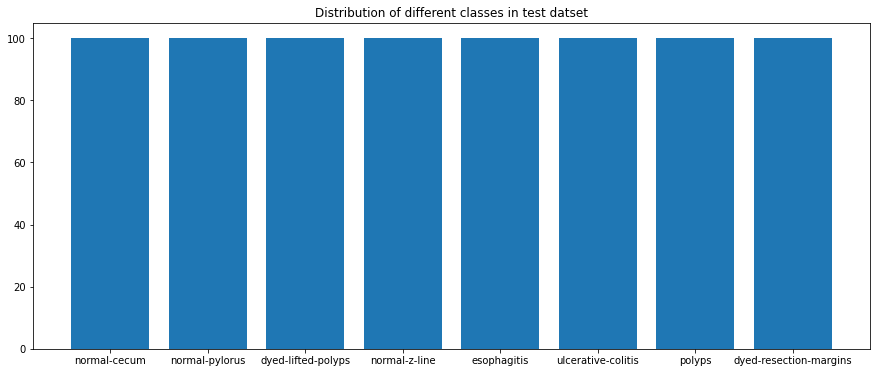

In [14]:
x=[]
path='./spiltted/test'
y=os.listdir(path)
for dirpath, dirnames, filenames in os.walk(path):
    n=len(filenames)
    x.append(n)
x=x[1:9]
new_dict = dict(zip(y, x))
plt.figure(figsize=(15, 6))
plt.bar(range(len(x)), list(new_dict.values()), align='center')
plt.xticks(range(len(x)), list(new_dict.keys()))
plt.title('Distribution of different classes in test datset')
plt.show()

In [15]:
# train_path='./spiltted/train'
# count(train_path)
# plot_count(x,y,new_dict)
# new_dict = dict(zip(y, x))
# plt.figure(figsize=(15, 6))
# plt.bar(range(len(x)), list(new_dict.values()), align='center')
# plt.xticks(range(len(x)), list(new_dict.keys()))
# plt.title('Distribution of different classes in training datset')
# plt.show()

In [16]:
# val_path='./spiltted/val'
# count(val_path)

# plt.figure(figsize=(15, 6))
# plt.bar(range(len(x)), list(new_dict.values()), align='center')
# plt.xticks(range(len(x)), list(new_dict.keys()))
# plt.title('Distribution of different classes in val datset')
# plt.show()

In [17]:
# #@title Model_dict_initialization
# import tensorflow_hub
# #import tensorflow_addons as tfa
# IMAGE_SHAPE = (500,500)

# url="https://tfhub.dev/google/imagenet/inception_v3/classification/5"
# # url="https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5"
# #url="https://tfhub.dev/tensorflow/resnet_50/feature_vector/1"
# #url="https://tfhub.dev/google/imagenet/inception_resnet_v2/feature_vector/5"
# model = tf.keras.Sequential([
#       tensorflow_hub.KerasLayer(url,trainable=False, input_shape=IMAGE_SHAPE+(3,)),
#       tf.keras.layers.Dense(500, activation='relu'),
#       tf.keras.layers.Dense(250,activation='relu'),
#       tf.keras.layers.Dense(100,activation='relu'),
#       tf.keras.layers.Dense(8,activation='softmax')
#       ])


# #model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'] )
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["categorical_accuracy", "Precision", "Recall"] )
# #model.compile(loss=custom_binary_crossentropy_loss, optimizer='sgd', metrics=['accuracy'],run_eagerly=True )

# #model_dict=dict(zip(classes,model_list))

In [18]:
from tensorflow.keras import regularizers
from tensorflow.keras.applications import DenseNet121
no_of_classes = 5
def densenet():
    base_model_dense = DenseNet121(weights = "imagenet" , include_top = False , input_shape=(224,224,3))
    x = base_model_dense.output
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(8, activation='softmax')(x)
    model = tf.keras.models.Model(inputs = base_model_dense.input , outputs =x )
    #for layer in model.layers[0:]:
        #layer.trainable = True
    for layer in model.layers[:]:
        layer.trainable = True
    #model = tf.keras.models.Model(inputs = base_model_res.input , outputs = pred)
    return model 


model_densenet =  densenet()

for layer in model_densenet.layers:
    if hasattr(layer, 'kernel_regularizer'):
        layer.kernel_regularizer= regularizers.l2(0.01)
    
    if hasattr(layer, 'bias_regularizer'):
        layer.bias_regularizer= regularizers.l2(0.01)
adam = tf.keras.optimizers.Adam(lr = 0.001)
model_densenet.compile(optimizer = adam , loss = 'categorical_crossentropy', metrics = ["categorical_accuracy", "Precision", "Recall"])
model_densenet.summary()

2022-05-11 15:50:23.724178: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-11 15:50:23.834832: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-11 15:50:23.835933: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-11 15:50:23.837991: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

29097984/29084464 [==============================] - 1s 0us/step


/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1/conv[0][0]                 
______________________________________________________________________________________________

In [19]:
# model.summary()

In [20]:
mc = ModelCheckpoint(mode='max', filepath='top-weights-na.h5', monitor='val_categorical_accuracy',save_best_only='True', verbose=1)
es = EarlyStopping(monitor='val_categorical_accuracy', patience=10, verbose=0)

In [21]:
history=model_densenet.fit(train_dataset,epochs=15, validation_data=valid_dataset, callbacks=[mc,es])

2022-05-11 15:50:36.564572: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/15


2022-05-11 15:50:51.864750: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


112/112 [==============================] - 235s 2s/step - loss: 0.5374 - categorical_accuracy: 0.8000 - precision: 0.8207 - recall: 0.7755 - val_loss: 7.7720 - val_categorical_accuracy: 0.3644 - val_precision: 0.3657 - val_recall: 0.3625

Epoch 00001: val_categorical_accuracy improved from -inf to 0.36437, saving model to top-weights-na.h5
Epoch 2/15
112/112 [==============================] - 208s 2s/step - loss: 0.3358 - categorical_accuracy: 0.8662 - precision: 0.8730 - recall: 0.8580 - val_loss: 1.6966 - val_categorical_accuracy: 0.6500 - val_precision: 0.6564 - val_recall: 0.6388

Epoch 00002: val_categorical_accuracy improved from 0.36437 to 0.65000, saving model to top-weights-na.h5
Epoch 3/15
112/112 [==============================] - 212s 2s/step - loss: 0.3126 - categorical_accuracy: 0.8755 - precision: 0.8816 - recall: 0.8693 - val_loss: 1.3406 - val_categorical_accuracy: 0.7294 - val_precision: 0.7368 - val_recall: 0.7262

Epoch 00003: val_categorical_accuracy improved from 

In [22]:
# test_dataset.class_indices

In [23]:
labels=test_dataset.class_indices

<Figure size 1440x1440 with 0 Axes>

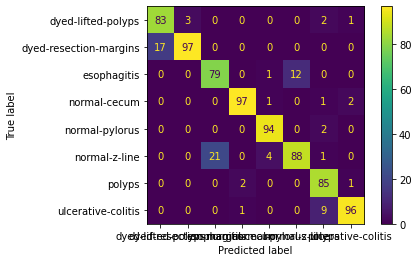

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import seaborn as sns
import numpy as np
Y_pred = model_densenet.predict(test_dataset)
y_pred = np.argmax(Y_pred, axis=1)

cm=confusion_matrix(y_pred, test_dataset.classes)
cm_plot=ConfusionMatrixDisplay(cm,display_labels=labels)
plt.figure(figsize=(20, 20))
cm_plot.plot()
plt.show()
# sns.heatmap(cm, annot=True,fmt="d",cmap='Blues')

In [25]:
# test_dataset = data.flow_from_directory('./spiltted/test',
#                         target_size=(224,224),batch_size=1,class_mode='categorical',shuffle=False)
model_densenet.evaluate(test_dataset, verbose=1)

80/80 [==============================] - 25s 309ms/step - loss: 0.2874 - categorical_accuracy: 0.8913 - precision: 0.8945 - recall: 0.8900


[0.28741246461868286,
 0.8912500143051147,
 0.8944723606109619,
 0.8899999856948853]

In [26]:
history.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'precision', 'recall', 'val_loss', 'val_categorical_accuracy', 'val_precision', 'val_recall'])

In [27]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='train_loss', marker='o')
    plt.plot( history.history['val_loss'], label='val_loss', marker='o')
    #plt.plot(history['train_loss_list'], label='train_loss', marker='o')
    plt.title('Loss'); plt.ylabel('Loss');
    plt.xlabel('Epoch')
    plt.legend(), plt.grid()
    plt.show()
    
def plot_accuracy(history):
    plt.plot(history.history['categorical_accuracy'], label='train_acc', marker='o')
    plt.plot( history.history['val_categorical_accuracy'], label='val_acc', marker='o')
    #plt.plot(history['train_loss_list'], label='train_loss', marker='o')
    plt.title('Accuracy'); plt.ylabel('Accuracy');
    plt.xlabel('Epoch')
    plt.legend(), plt.grid()
    plt.show()
    
def plot_precision(history):
    plt.plot(history.history['precision'], label='train_precision', marker='o')
    plt.plot( history.history['val_precision'], label='val_precision', marker='o')
    #plt.plot(history['train_loss_list'], label='train_loss', marker='o')
    plt.title('Precision'); plt.ylabel('Precision');
    plt.xlabel('Epoch')
    plt.legend(), plt.grid()
    plt.show()
    
def plot_recall(history):
    plt.plot(history.history['recall'], label='train_recall', marker='o')
    plt.plot( history.history['val_recall'], label='val_recall', marker='o')
    #plt.plot(history['train_loss_list'], label='train_loss', marker='o')
    plt.title('Recall'); plt.ylabel('Recall');
    plt.xlabel('Epoch')
    plt.legend(), plt.grid()
    plt.show()

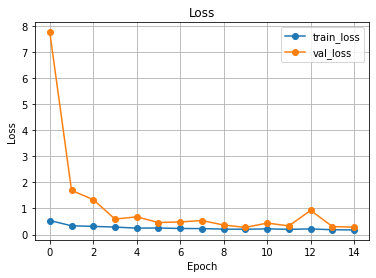

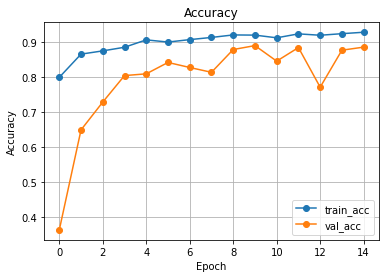

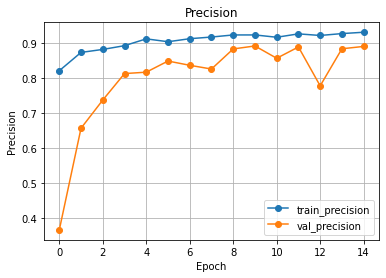

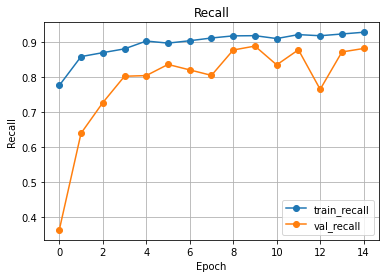

In [28]:
plot_loss(history)
plot_accuracy(history)
plot_precision(history)
plot_recall(history)

In [29]:
os.mkdir('/kaggle/working/mysaved_minor05')

In [30]:
print(Y_pred)

[[5.59364140e-01 4.40635115e-01 3.62278518e-09 ... 9.18811605e-09
  1.43237475e-08 2.09946649e-07]
 [8.58153820e-01 1.41845092e-01 4.04614184e-07 ... 4.23258342e-07
  1.35871716e-07 1.79528996e-07]
 [8.12509179e-01 1.87483042e-01 3.40849101e-06 ... 3.57158456e-06
  1.82495683e-07 6.25095083e-07]
 ...
 [4.27615742e-05 6.43578678e-05 1.01275253e-03 ... 7.57472371e-05
  3.32477246e-03 7.34016240e-01]
 [1.24387603e-04 1.74155488e-04 8.08999036e-03 ... 5.77571918e-05
  3.40674538e-04 9.91212904e-01]
 [3.77276767e-04 4.59723873e-04 2.62241185e-01 ... 2.19513401e-02
  6.72378344e-04 7.13958323e-01]]


In [31]:
model_densenet.save('./mysaved_minor05')

2022-05-11 16:49:39.657986: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


In [32]:
print(Y_pred)

[[5.59364140e-01 4.40635115e-01 3.62278518e-09 ... 9.18811605e-09
  1.43237475e-08 2.09946649e-07]
 [8.58153820e-01 1.41845092e-01 4.04614184e-07 ... 4.23258342e-07
  1.35871716e-07 1.79528996e-07]
 [8.12509179e-01 1.87483042e-01 3.40849101e-06 ... 3.57158456e-06
  1.82495683e-07 6.25095083e-07]
 ...
 [4.27615742e-05 6.43578678e-05 1.01275253e-03 ... 7.57472371e-05
  3.32477246e-03 7.34016240e-01]
 [1.24387603e-04 1.74155488e-04 8.08999036e-03 ... 5.77571918e-05
  3.40674538e-04 9.91212904e-01]
 [3.77276767e-04 4.59723873e-04 2.62241185e-01 ... 2.19513401e-02
  6.72378344e-04 7.13958323e-01]]


In [33]:
model = keras.models.load_model('/kaggle/working/mysaved_minor05')

In [34]:
# import numpy as np
# import cv2
# # for dirpath, dirnames, filenames in os.walk('./spiltted/test'):
# img=cv2.imread("../input/the-kvasir-dataset/kvasir-dataset-v2/esophagitis/0134d93d-0922-4063-9acd-a4177f2b0c07.jpg")
# res = cv2.resize(img, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
# res = np.expand_dims(res, axis=0)
# x=np.argmax(model.predict(res))
    
# # model.predict(res)

In [35]:
# def load_images_from_folder(folder):
#     images = []
#     for filename in os.listdir(folder):
#         img = cv2.imread(os.path.join(folder,filename))
#         if img is not None:
#             images.append(img)
#     return images

In [36]:
# import cv2
# import numpy
# import glob
# for dirpath, dirnames, filenames in os.walk('./spiltted/test'):
# #     folders = glob.glob(dirpath)

#     imagenames_list = []
#     for folder in dirpath:
#         for f in glob.glob(dirpath+'/*.jpg'):
#             imagenames_list.append(f)

#     read_images = []        
#     for image in imagenames_list:
#         read_images.append(cv2.imread(image))

In [37]:
# len(read_images)

In [38]:
# os.mkdir('/kaggle/working/mysaved_minor')

In [39]:
# model.save('./mysaved_minor')


In [40]:
# model = keras.models.load_model('./mysaved')

In [41]:
# x=[]
# y=os.listdir(path)
# for dirpath, dirnames, filenames in os.walk(path):
#     n=len(filenames)
#     x.append(n)
# x=x[1:9]

In [42]:
# a=os.listdir('./spiltted/test')
# z=[]
# for dirpath, dirnames, filenames in os.walk("./spiltted/test"):
# #     print(dirpath)
# #     print(dirnames)
# #     print((filenames))
   
#     if 'dyed-lifted-polyps' == dirpath:
#         z.append(0*100)
# #     filename_array=np.array(filenames)
# #     print(filename_array.size )
#         print(z)

In [43]:
z

NameError: name 'z' is not defined

In [ ]:
# z=[]
# for i in range(8):
#     z.append([i]*100)

In [ ]:
# Y_test=z

In [ ]:
# y_pred=np.argmax(y_pred)
# y_pred

In [ ]:
# from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
# # Y_test=np.argmax(y_test, axis=1)
# y_pred=np.argmax(y_pred)
# cm=confusion_matrix(Y_test,y_pred)
# cm_plot=ConfusionMatrixDisplay(cm,display_labels=['0','1','2','3','4','5','6','7'])
# cm_plot.plot()
# plt.show()